# Measures of Central Tendency

Describing and summarizing data is important to understanding it at scale. Descriptive statistics summarize raw observations into information that can be understood and shared. At the heart of the matter is describing data via their distributions.

Measures of central tendency of a distribution reflect which observations one is most likely to witness if sampling from that distribution.

## Mean, Median, Mode

- The <b>mean</b> is the average value - it asks whether values are clustered around a particular point
- The <b>median</b> describes the middle percentile - the halfway point in a list of sorted observations - and is unaffected by outliers
- The <b>mode</b> describes the most frequent observation(s), and whether there is more than one cluster

For a thoeretical normal distribution (though not necessarily a sampled one), the mean, median, and mode have the same value

### Mean

Let's start by importing a couple of libraries, and setting a style for the charts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

Next I will import the 'norm' package from Scipy, and use it to generate some random data from a normal distribution (distributions are the topic of a later notebook in this series).

In [2]:
from scipy.stats import norm
mu = 0
sd = 1
data = norm.rvs(loc=mu, scale=sd, size=300, random_state=123)

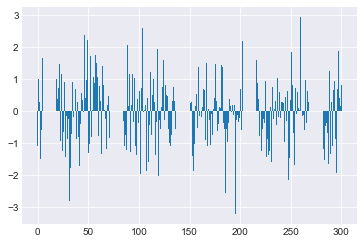

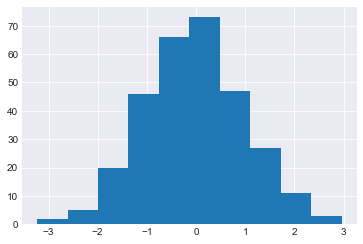

In [3]:
plt.bar(np.linspace(0,len(data),300),data)
plt.show();
plt.hist(data);

And then calculate the mean, 

$$\frac{1}{n} \sum_{i=1}^n x_i$$ 

In [4]:
# Calculate the mean using a built-in function
data.mean()

-0.029185933219752772

In [5]:
# Calculate the mean from component functions
mean = sum(data)/len(data)
mean

-0.02918593321975275

Note that even though we specified a mu ($\mu$) of zero for the random data, the mean is not exactly zero (though close). This is due to what is referred to as sampling variability. <i>The law of large numbers</i> tells us that a greater sample size will lead to a mean closer to the 'population' we are drawing from. For example, if 10,000 points were generated instead of 300.

Mean: 0.009711892291595955


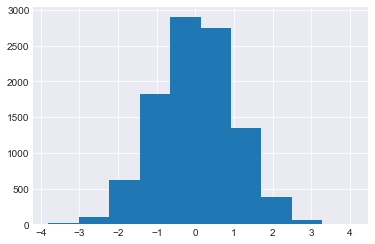

In [6]:
from scipy.stats import norm
mu = 0
sd = 1
data = norm.rvs(loc=mu, scale=sd, size=10000, random_state=123)
print('Mean:', data.mean())
plt.hist(data);

Notice the mean (printed just above the histogram) is now much closer to the specified $\mu$ of 0

### Median

If you sort your data points by value, the point in the middle of the list is the median. If there are an even number of points, a tie-breaker such as rounding to the first-occurring of the two is used. 

What's helpful about the median is that while the mean can be heavily skewed by outliers, the median does not look at the values of the observations - it only cares where the middle point resides, and returns its value. As such, it can be a more reliable or informative measure of central tendency for some purposes.

In [7]:
# Median of our new normal distribution using Numpy
np.median(data)

0.011846468442650918

In [8]:
# Median from scratch
median = sorted(data)[len(data) // 2] # // divides and rounds to the next-smallest whole number
median

0.011888955772325212

The median does not match the mean, but again due to sampling variability... what if we generate 10 million points?

Mean: 0.0097
Median: 0.0118


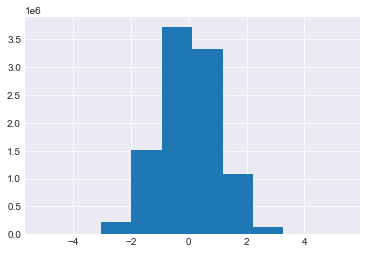

In [9]:
from scipy.stats import norm # more on this in the lessons to come
mu = 0
sd = 1
x = norm.rvs(loc=mu, scale=sd, size=10000000, random_state=123)
print('Mean:', round(data.mean(),4))
print('Median:', round(np.median(data),4))
plt.hist(x);

Notice how much closer the mean and median now are. Notice as well how much closer to zero they both are, given the larger sample size.

An (essentially) equal mean and median is a property of the normal distribution. Let's take a look at the difference between mean and median in a distribution that isn't quite as symmetrical - the chi-square distribution:

Mean:  5.070719254813054
Median:  4.4965134036434815


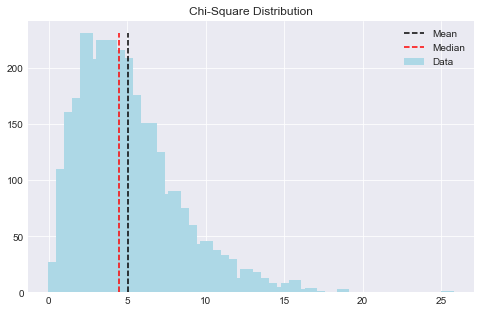

In [10]:
from scipy.stats import chi2
data = chi2.rvs(size=3000, df=5, random_state=123)

mean = np.mean(data)
median = np.median(data)

y,x = np.histogram(data,50)
x = (x[:-1]+x[1:])/2

print('Mean: ', mean)
print('Median: ', median)

fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(x, y, color='lightblue', label="Data")
ax.plot([mean,mean],[0,max(y)],'k--', label="Mean")
ax.plot([median,median],[0,max(y)],'r--', label="Median")
ax.set_title('Chi-Square Distribution')
ax.legend()
plt.show()

The median of this distribution is noticably lower than the average, because a small number of data points on the right side of the distribution are carrying relatively high values, skewing the mean toward them.

### Mode

The mode is the value observed most frequently in the dataset, and may be tied amongst two or more values. A distribution with multiple humps is said to be multi-modal.

We can use the Pandas module to call upon a built-in mode function. I will round the values of the generated data to two digits so as to better-discretize them.

In [11]:
import pandas as pd

In [12]:
# Round the data points
y = [round(x,2) for x in data]

In [13]:
# Create a Pandas dataframe and run the mode function
df = pd.DataFrame(y, columns=['values'])
md = df.mode().values
md

array([[3.09]])

To help prove to ourselves that this is correct, we can obtain the count of rows containing this value, and put that procedure into a loop in case you encounter multiple modes with modified data.

In [14]:
for i in range(0,len(md)):
    print(np.squeeze(md[i]), 'Count of: ', df[df['values'] == np.squeeze(md[i])].count());

3.09 Count of:  values    11
dtype: int64


This is how the mode is found when operating upon raw values. If operating upon histogram-formatted data, then the data are more discretized, and the mode would correspond to the bin or bins carrying the largest count of values.

In [15]:
y,x = np.histogram(data,100)
x = (x[:-1]+x[1:])/2

In [16]:
for i in range(0,len(y)):
    if y[i] == max(y):
        mode_st = x[i-1]
        mode_end = x[i]
print(mode_st, mode_end)

3.023206755994256 3.278815908101779


Notice that the mode of 3.09 obtained at the data-point level is associated with the tallest bin of the histogram

## Bonus: Percentile and Quartile

The definition of percentile is illustrated by the fact that our median resides at the 50th percentile. If we wanted to know what value is found along a different percentile, such as 25% or 75% of the way down our list of sorted values, this can be achieved as well. 

To use data that is more meaningful, let's simulate it based on the observed average and variability of human height in cm (ignoring the gender distinction).

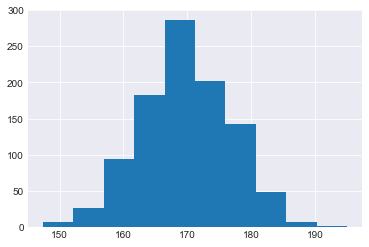

In [17]:
mu = 170
sd = 7
data = norm.rvs(loc=mu, scale=sd, size=1000, random_state=123)
plt.hist(data);

A box plot tells us about the spread of data in relation to the interquartile range. This means the 25th to 75th percentile, represented by the top and bottom edge of the box in the plot below. Near the middle of the box is the median, denoted by the orange line. Like a histogram, it helps us to understand how centered the data is, in relation to the center. In other words, whether or not the majority of values are clustered around the median, and to what degree.

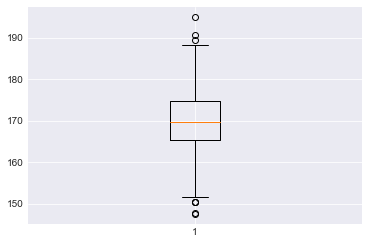

In [18]:
plt.boxplot(data);

The 'ppf' function in Scipy can tell us at what height is at the 90th percentile, for the appropriate distribution (which is in this case the normal distribution):

In [19]:
norm.ppf(0.90, loc=mu, scale=sd)

178.9708609588122

<i>At a height of approx. 179cm, you are taller than approx. 90% of the population.</i>

The 'cumulative density function' can be used to ask a similar question, but in reverse - for example, if you are 175cm tall, which percentile are you in?

In [20]:
norm.cdf(175, loc=mu, scale=sd)

0.7624747379730235

<i>Approximately the 76th percentile</i>